### Integrantes do Trabalho:
* Vinicius Ramalho
* Luan Machado
* Eduardo Uchôa

# Importes

In [64]:
import re
import arch
import math
import scipy
import quandl
import random
import matplotlib
import numpy as np
import pandas as pd
import scipy.stats as st
from arch import arch_model
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Desabilita os alertas

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Defina risco e liste os vários tipos de risco

Risco é uma medida de incerteza e/ou potecial de perda financeira em função das mudanças das váriveis observadas associado ao futuro. Por exemplo, o risco de uma ação varias negativamente amanhã devido o aumento da taxa de juros.

Tipos de risco:
* Mercado
* Liquidez
* Taxa de juros
* Cambio
* Crédito
* Operacional
* Legal
* entre outros...

# 2. A pandemia do covid-19 está relacionada a que tipo de risco? Por quê?

Podemos associar o covid-19 ao aumento de vários tipos de risco, entre eles risco crédito, risco de mercado, risco operacional e risco de liquidez.

### Risco de Crédito
Deterioração da qualidade de crédito em certos setores, com impacto nos “ratings” de crédito e limites de crédito.
Programas de suporte do governo e as medidas de alívio possuem reflexo nas provisões de crédito
### Risco de Mercado
Condições estressantes do mercado, com movimentos de ajuste nas avaliações de crédito, “spreads” de financiamento e maior volatilidade.
### Risco Operacional
As incertezas do COVID-19 impactam nos processos operacionais, com atrasos no cumprimento de cronogramas de conformidade regulatória e implementação de controles devido à falta de recursos, seja por redução de custos ou indisponibilidade de pessoal devido a medidas cautelares relacionadas à pandemia emitidas pelo governo.
Falta de compreensão dos potenciais riscos operacionais emergentes das iniciativas lançadas durante a pandemia, incluindo migração de alguns processos operacionais para home office e casos de fraude relacionados ao COVID-19.
### Risco de Liquidez
Restrições inesperadas de liquidez por conta de grandes saques e acesso limitado a fontes alternativas de financiamento.

# 3. Baixe 5 séries financeiras cotações de ações. Uma delas deve ser obrigatoriamente o Ibovespa e as outras quatro podem ser as que você decidir (2 anos, frequência diária).

In [3]:
# Lê os arquivos CSV
BBAS = pd.read_csv("BBAS3.SA.csv")
IBOV = pd.read_csv("IBOV.csv")
MGLU = pd.read_csv("MGLU3.SA.csv")
PETR = pd.read_csv("PETR3.SA.csv")
VALE = pd.read_csv("VALE3.SA.csv")

# Filtra apenas as colunas Date e Close
BBAS = BBAS[['Date','Close']]
IBOV = IBOV[['Date','Close']]
MGLU = MGLU[['Date','Close']]
PETR = PETR[['Date','Close']]
VALE = VALE[['Date','Close']]

# Renomeia as colunas
BBAS.rename(columns = {'Date':'Data','Close':'Preço'}, inplace = True)
IBOV.rename(columns = {'Date':'Data','Close':'Preço'}, inplace = True)
MGLU.rename(columns = {'Date':'Data','Close':'Preço'}, inplace = True)
PETR.rename(columns = {'Date':'Data','Close':'Preço'}, inplace = True)
VALE.rename(columns = {'Date':'Data','Close':'Preço'}, inplace = True)

#  4. Calcule os retornos diários e plote os gráficos dos retornos.

In [9]:
# Cálcula o retorno diário
BBAS['Retorno'] = BBAS['Preço'].pct_change()
IBOV['Retorno'] = IBOV['Preço'].pct_change()
MGLU['Retorno'] = MGLU['Preço'].pct_change()
PETR['Retorno'] = PETR['Preço'].pct_change()
VALE['Retorno'] = VALE['Preço'].pct_change()

# Cria um Data Frame Unico
retornos = pd.DataFrame()
retornos['Data'] = BBAS['Data']
retornos['BBAS'] = BBAS['Retorno']
retornos['IBOV'] = IBOV['Retorno']
retornos['MGLU'] = MGLU['Retorno']
retornos['PETR'] = PETR['Retorno']
retornos['VALE'] = VALE['Retorno']
retornos = retornos.dropna()

### Plotando os gráficos

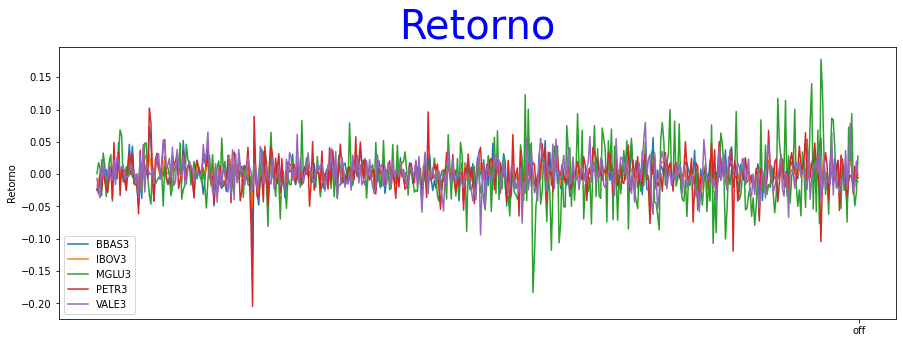

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
for acao in retornos.columns:
    if acao != 'Data':
        ax.plot(retornos['Data'],retornos[acao], label=f'{acao}3')
ax.set_ylabel('Retorno')
ax.set_title(label=f"Retorno", fontsize=40, color="blue")
ax.legend()
plt.xticks('off')

plt.show()

# 5. Forme um portifólio com as 4 séries de retornos (as que não são Ibovespa). Deixe claro como formou o portifólio. Plote a série de retornos do portifólio

### Definindo o portifolio
Foi considerado como maior peso as ações que possuem melhor indice sharpe

In [21]:
print(f"Sharpe Ratio da BBAS3: {BBAS['Retorno'].mean()/BBAS['Retorno'].std():,.5f}")
print(f"Sharpe Ratio da MGLU3: {MGLU['Retorno'].mean()/MGLU['Retorno'].std():,.5f}")
print(f"Sharpe Ratio da PETR3: {PETR['Retorno'].mean()/PETR['Retorno'].std():,.5f}")
print(f"Sharpe Ratio da VALE3: {VALE['Retorno'].mean()/VALE['Retorno'].std():,.5f}")

portifolio = {'BBAS3':30,'MGLU3':5,'PETR3':45,'VALE3':20}

Sharpe Ratio da BBAS3: 0.03091
Sharpe Ratio da MGLU3: -0.05769
Sharpe Ratio da PETR3: 0.04577
Sharpe Ratio da VALE3: 0.01982


### Plotando o portifolio

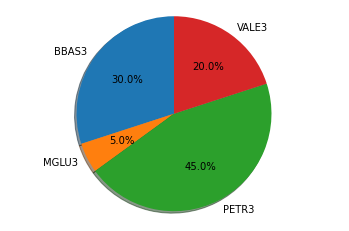

In [22]:
labels = 'BBAS3', 'MGLU3', 'PETR3', 'VALE3'
sizes = [portifolio['BBAS3'],portifolio['MGLU3'],portifolio['PETR3'], portifolio['VALE3']]

fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

### Cálculando o retorno do portifolio

In [30]:
retorno_portifolio = pd.DataFrame()
retorno_portifolio['Data'] = retornos['Data']
retorno_portifolio['Retorno'] = (retornos['BBAS']*portifolio['BBAS3']/100) + (retornos['MGLU']*portifolio['MGLU3']/100) + (retornos['PETR']*portifolio['PETR3']/100) + (retornos['VALE']*portifolio['VALE3']/100)

#Adicionado ao Data Frame Retornos o retorno dos portifolios
retornos['Portifolio'] = retorno_portifolio['Retorno']

### Plotando o retorno do portifolio

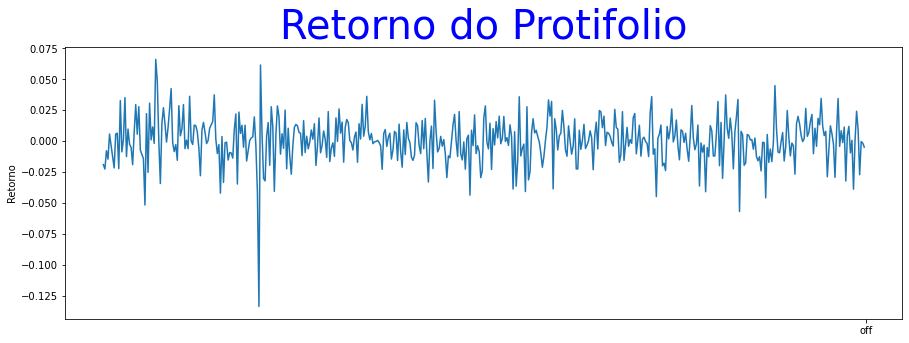

In [31]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(retorno_portifolio['Data'],retorno_portifolio['Retorno'], label='Portifolio')

ax.set_ylabel('Retorno')
ax.set_title(label="Retorno do Protifolio", fontsize=40, color="blue")
plt.xticks('off')

plt.show()

# 6. Calcule a matriz de correlação entre todos as séries de retorno (ibovespa, 4 ações e portifólio).

In [32]:
matriz_correlação = pd.DataFrame({
    'IBOV': IBOV['Retorno'],
    'BBAS3': BBAS['Retorno'],
    'PETR3': PETR['Retorno'],
    'VALE3': VALE['Retorno'],
    'MGLU': MGLU['Retorno'],
    'Portifolio': retorno_portifolio['Retorno']
}).corr()
print(matriz_correlação)

                IBOV     BBAS3     PETR3     VALE3      MGLU  Portifolio
IBOV        1.000000  0.699313  0.595371  0.466396  0.484135    0.793805
BBAS3       0.699313  1.000000  0.511297  0.202876  0.207119    0.735494
PETR3       0.595371  0.511297  1.000000  0.283340  0.060136    0.909588
VALE3       0.466396  0.202876  0.283340  1.000000  0.071978    0.516338
MGLU        0.484135  0.207119  0.060136  0.071978  1.000000    0.237126
Portifolio  0.793805  0.735494  0.909588  0.516338  0.237126    1.000000


# 7. Calcule as seguintes estatísticas descritivas para todas as séries de retorno: média, desvio padrão, mediana, máximo, mínimo, curtose e assimetria. Calcule também a Sharpe Ratio para cada série. Qual o significado da Sharpe Ratio?

### Cálculando as estatísticas

In [85]:
for acao in retornos.columns:
    if acao != 'Data':
        estatistica = retornos[acao].describe()[['mean','std','max','min']]
        estatistica['Assimetria'] = retornos[acao].skew()
        estatistica['Curtose'] = retornos[acao].kurtosis()
        estatistica['Mediana'] = retornos[acao].median()
        estatistica['Sharpe Ration'] = estatistica['mean']/estatistica['std']
        estatistica = estatistica.rename({'mean': 'Média', 'std': 'Desvio Padrão','min': 'Mínimo', 'max': 'Máximo'})
        if acao == 'Retorno':
            acao = 'Portifolio'
        print(f'Estatística Descritiva da {acao}')
        print(estatistica)
        print('============================================')

Estatística Descritiva da BBAS
Média            0.000599
Desvio Padrão    0.019367
Máximo           0.072483
Mínimo          -0.116457
Assimetria      -0.185934
Curtose          3.097240
Mediana          0.000000
Sharpe Ration    0.030908
Name: BBAS, dtype: float64
Estatística Descritiva da IBOV
Média            0.000260
Desvio Padrão    0.012888
Máximo           0.036626
Mínimo          -0.051201
Assimetria      -0.414253
Curtose          0.520961
Mediana          0.000589
Sharpe Ration    0.020212
Name: IBOV, dtype: float64
Estatística Descritiva da MGLU
Média           -0.002363
Desvio Padrão    0.040961
Máximo           0.177632
Mínimo          -0.183150
Assimetria       0.314664
Curtose          1.945249
Mediana         -0.003909
Sharpe Ration   -0.057690
Name: MGLU, dtype: float64
Estatística Descritiva da PETR
Média            0.001236
Desvio Padrão    0.026993
Máximo           0.102164
Mínimo          -0.204797
Assimetria      -1.047366
Curtose          8.303679
Mediana        

### Sharpe Ratio
Em finanças, o índice de Sharpe mede o desempenho de um investimento, como um título ou carteira, em comparação com um ativo livre de risco, após o ajuste. É definido como a diferença entre os retornos do investimento e o retorno livre de risco, dividido pelo desvio padrão dos retornos do investimento. Representa o valor adicional de retorno que um investidor recebe por unidade de aumento de risco.

# 8. Para cada série de retorno das ações e para o retorno do seu portifólio, calcule o “beta” do modelo CAPM (assuma taxa livre de risco igual a zero). Qual dos ativos está mais exposto ao risco sistêmico? Por quê?

In [33]:
premio_risco = sm.add_constant(IBOV['Retorno'], prepend=False).dropna()

for acao in retornos.columns:
    if acao != 'Data' and acao != 'IBOV':
        summary_mod = sm.OLS(retornos[acao], premio_risco).fit().summary().as_text()
        b = re.search(r"Retorno[ ]+([\d.]+)[ ]+", summary_mod).group(1)
        b = float(b)
        print(f"O beta para {acao} é {b:,.4f}")

O beta para BBAS é 1.0509
O beta para MGLU é 1.5387
O beta para PETR é 1.2469
O beta para VALE é 0.8374
O beta para Portifolio é 1.1208


### Conclusão
Quando o beta é maior que 1 temos uma sensibilidade maior para as variações do mercado, ou seja, a ação MGLU3 possui mais risco sistemico visto ter o beta mais próximo de 1 do que as outras.

# 9. (Volatilidade) Estime a volatilidade de todas as séries de retorno usando os seguintes métodos: Desvio Padrão, Desvio Padrão Móvel (30 dias), Down Side Deviation, EWMA e GARCH (1,1). Qual dos ativos apresenta maior risco por esses critérios?

In [34]:
var_parametrico = {}

### Desvio Padrão

In [35]:
desvpad = {}
for acao in retornos.columns:
    if acao != 'Data':
        dp = retornos[acao].std()
        print(f"Desvio Padrão da {acao}: {dp:,.5f}")
        desvpad[acao] = dp
var_parametrico['Desvio Padrão'] = desvpad

Desvio Padrão da BBAS: 0.01937
Desvio Padrão da IBOV: 0.01289
Desvio Padrão da MGLU: 0.04096
Desvio Padrão da PETR: 0.02699
Desvio Padrão da VALE: 0.02314
Desvio Padrão da Portifolio: 0.01820


### Desvio Padrão Móvel (30 dias)

In [36]:
desvpad_movel = {}
for acao in retornos.columns:
    if acao != 'Data':
        dpm = retornos[acao].rolling(30).std()[len(IBOV)-1]
        print(f"Desvio Padrão Móvel (30 dias) {acao}: {dpm:,.5f}")
        desvpad_movel[acao] = dpm
var_parametrico['Desvio Padrão Movel'] = desvpad_movel

Desvio Padrão Móvel (30 dias) BBAS: 0.02256
Desvio Padrão Móvel (30 dias) IBOV: 0.01270
Desvio Padrão Móvel (30 dias) MGLU: 0.06243
Desvio Padrão Móvel (30 dias) PETR: 0.03026
Desvio Padrão Móvel (30 dias) VALE: 0.02766
Desvio Padrão Móvel (30 dias) Portifolio: 0.01781


### Down Side Deviation

In [38]:
down_side_deviation = {}
for acao in retornos:
    if acao != 'Data':
        dsd = retornos[acao].apply(lambda x: x if x < 0 else 0).std()
        print(f"Down Side Desviation {acao}: {dsd:,.5f}")
        down_side_deviation[acao] = dsd
var_parametrico['Down Side Deviation'] = down_side_deviation

Down Side Desviation BBAS: 0.01145
Down Side Desviation IBOV: 0.00805
Down Side Desviation MGLU: 0.02396
Down Side Desviation PETR: 0.01765
Down Side Desviation VALE: 0.01331
Down Side Desviation Portifolio: 0.01168


### EWMA

EWMA de BBAS: 0.01970
EWMA de IBOV: 0.01247
EWMA de MGLU: 0.05681
EWMA de PETR: 0.02619
EWMA de VALE: 0.02738
EWMA de Portifolio: 0.01697


<AxesSubplot:>

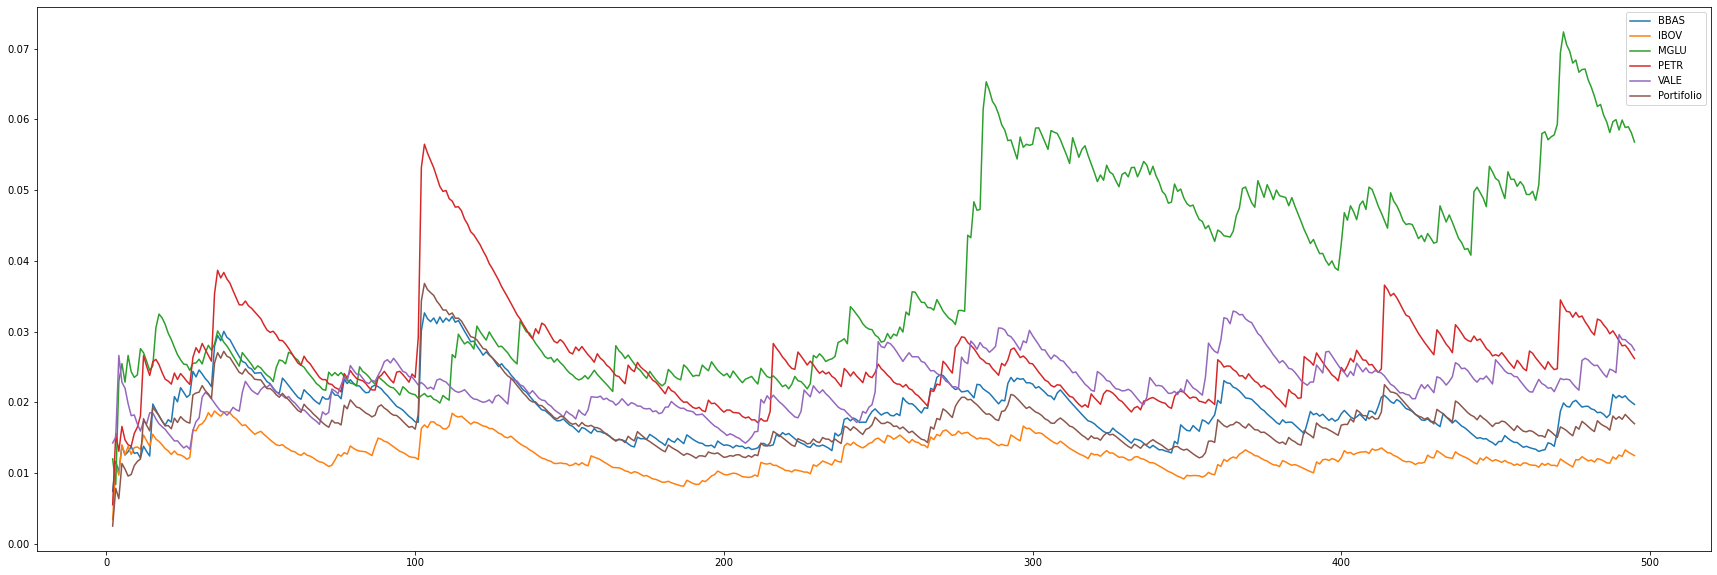

In [41]:
desvio_ewma = {}
ewma = retornos.ewm(alpha = 0.05, min_periods=1).std()
for acao in ewma:
    d_ewma = ewma[acao].iloc[len(ewma)-1]
    print(f"EWMA de {acao}: {d_ewma:,.5f}")
    desvio_ewma[acao] = d_ewma
var_parametrico['EWMA'] = desvio_ewma
ewma.plot(figsize=(30,10))

### GARCH (1,1)

In [50]:
desvio_garch = {}
for acao in retornos.columns:
    if acao != 'Data':
        garch_model = arch_model(retornos[acao], p=1, q=1, vol='GARCH', dist='Normal')
        garch_resultado = garch_model.fit(disp='off')
        d_garch = garch_resultado.forecast(horizon=1).variance[-1:].iloc[0]['h.1']*100
        desvio_garch[acao] = d_garch
        print(f'GARCH(1,1) para {acao}: {d_garch:,.5f}')
var_parametrico['GARCH'] = desvio_garch

GARCH(1,1) para BBAS: 0.03448
GARCH(1,1) para IBOV: 0.01611
GARCH(1,1) para MGLU: 0.26628
GARCH(1,1) para PETR: 0.05736
GARCH(1,1) para VALE: 0.04856
GARCH(1,1) para Portifolio: 0.02671


# 10. Valor em Risco (VaR). O que é VaR? Defina formalmente.
O Value at Risk ou VaR refere-se a um indicador de risco que considera a perda máxima possível de um investimento em um período de tempo e intervalo de confiança estabelecido.

# 11. Como podemos estimar o VaR? Cite uma vantagem e uma desvantagem de cada um dos métodos vistos em aula.
* O VaR é estimado pela formula VaR = Z*D*X, onde Z é o valor da função normal dado um alpha, D é o desvio padrão de acordo com o método escolhido e X é o valor da carteira.
* Desvio Padrão: Esse Método é mais básico, portanto permite um rápido cálculo sem precisar de ferramentas mais complexas, porém pode incorrer em um erro maior devido não considerar o curto prazo, apensa a amostra inteira
* Desvio Padrão Movel: Esse método é simples de cálcular igualmente o anterior, a desvantagem é não considerar o longo prazo
* Down Side: Esse método considera apenas os valores negátivos, portanto pegará as piores baixas da serie, o ponto negativo é que não pega os picos podendo comprometer o real risco da ação
* EWMA: Esse método é mais complexo, portanto precisa de uma ferramenta superiro para cálculo, porém consiste na evolução da volatilidade no tempo, deixando possivel a análise no curto e longo prazo
* GARCH: Esse método é mais complexo e requer desenvolvimento do modelo para acuracia, porém traz um erro menor que os demais
* Simulação Historica: A simulação permite apurar com menor erro a pior perda que é possivel ter, como não possui formula simples é necessário fazer a simulação
* Simulação de Monte Carlo: Como a anterior é necessário de simulações, porém por considerar erros normais gera variações mais próximas da realidade
* Expected Shortfall: A desvantagem  desse método é que é necessário a execução de outro método para acurancia, além de superstimar a perda. A vantagem e que a perda real sempre será menor que a projetada

# 12. Como a estimação do VaR paramétrico normal pode ficar comprometida se a série de retornos é leptocurtica (com caudas pesadas)?
O VaR paramétrico considera que os retornos possuem distribuição normal, porém caso a série de retornos seja lepcurtica a função não adminite que a hipotese de normalidade seja verdadeira, comprometendo assim a estimação do VaR.

# 13. Estime o VaR paramétrico para a série de retornos do seu portfolio (para níveis de significância 1% e 5%, e intervalo de 1 dia). Compare o VaR paramétrico usando desvio padrão e usando alguma outra volatilidade estimada (GARC(1,1), por exemplo). Interprete os resultados. (Deixe claro qual o valor do seu portfolio, X0)

X0 = R$ 100.000,00

In [58]:
x = 100000
for var in var_parametrico:
    print(f"=============== VaR Parametrico {var} ===============")
    var_1 = var_parametrico[var]['Portifolio']*x*st.norm.ppf(0.01)*(-1)
    var_5 = var_parametrico[var]['Portifolio']*x*st.norm.ppf(0.05)*(-1)
    print(f"VaR Paramétrico de 1% para um dia ({var}): R$ {var_1:,.2f}")
    print(f"VaR Paramétrico de 5% para um dia ({var}): R$ {var_5:,.2f}")
    print(f"""
Temos 1% de chance de perder mais do que R$ {var_1:,.2f} em 1 dia e 
      5% de chance de perder mais do que R$ {var_5:,.2f} em 1 dia
""")

=============== VaR Parametrico Desvio Padrão ===============
VaR Paramétrico de 1% para um dia (Desvio Padrão): R$ 4,233.31
VaR Paramétrico de 5% para um dia (Desvio Padrão): R$ 2,993.18

Temos 1% de chance de perder mais do que R$ 4,233.31 em 1 dia e 
      5% de chance de perder mais do que R$ 2,993.18 em 1 dia

=============== VaR Parametrico Desvio Padrão Movel ===============
VaR Paramétrico de 1% para um dia (Desvio Padrão Movel): R$ 4,143.14
VaR Paramétrico de 5% para um dia (Desvio Padrão Movel): R$ 2,929.42

Temos 1% de chance de perder mais do que R$ 4,143.14 em 1 dia e 
      5% de chance de perder mais do que R$ 2,929.42 em 1 dia

=============== VaR Parametrico Down Side Deviation ===============
VaR Paramétrico de 1% para um dia (Down Side Deviation): R$ 2,718.23
VaR Paramétrico de 5% para um dia (Down Side Deviation): R$ 1,921.93

Temos 1% de chance de perder mais do que R$ 2,718.23 em 1 dia e 
      5% de chance de perder mais do que R$ 1,921.93 em 1 dia

=============

### Conclusão
* Comparando o Desvio Padrão com o Down Side percebemos que o utlimo método tem valor menor, isso pode indicar um subsestimação do VaR pelo método Down Side ou supestimação do método pelo Desvio Padrão

# 14. Estime o VaR com a simulação histórica para a série de retornos do seu portfolio (para níveis de significância 1% e 5%, e intervalo de 1 dia). Interprete os resultados. Compare com o VaR paramétrico. Comente. Qual seria o VaR (1% e 5%) para 30 dias a frente? Use o mesmo X0.

In [59]:
nvar_parametrico = {}

In [67]:
nVaR_1 = st.scoreatpercentile(retornos['Portifolio']*x,1)*(-1)
nVaR_5 = st.scoreatpercentile(retornos['Portifolio']*x,5)*(-1)

var_1 = var_parametrico['Desvio Padrão']['Portifolio']*x*st.norm.ppf(0.01)*(-1)
var_5 = var_parametrico['Desvio Padrão']['Portifolio']*x*st.norm.ppf(0.05)*(-1)

print(f"""
VaR Não Parametrico de 1% para 1 dia (Simulação Histórica): R$ {nVaR_1:,.2f}
VaR Não Parametrico de 5% para 1 dia (Simulação Histórica): R$ {nVaR_5:,.2f}
        """)

print(f"""
VaR Parametrico de 1% para 1 dia (Desvio Padrão): R$ {var_1:,.2f}
VaR Parametrico de 5% para 1 dia (Desvio Padrão): R$ {var_5:,.2f}
        """)

print(f"""
Temos 1% de chance de perder mais do que R$ {nVaR_1:,.2f} em 1 dia e 
      5% de chance de perder mais do que R$ {nVaR_5:,.2f} em 1 dia
""")

print(f"""
Temos 1% de chance de perder mais do que R$ {nVaR_1*math.sqrt(30):,.2f} em 30 dia e 
      5% de chance de perder mais do que R$ {nVaR_5*math.sqrt(30):,.2f} em 30 dia
""")


nvar_parametrico['Simulação Histórica'] = {'Portifolio 1%':nVaR_1,'Portifolio 5%':nVaR_5}


VaR Não Parametrico de 1% para 1 dia (Simulação Histórica): R$ 4,363.93
VaR Não Parametrico de 5% para 1 dia (Simulação Histórica): R$ 2,955.58
        

VaR Parametrico de 1% para 1 dia (Desvio Padrão): R$ 4,233.31
VaR Parametrico de 5% para 1 dia (Desvio Padrão): R$ 2,993.18
        

Temos 1% de chance de perder mais do que R$ 4,363.93 em 1 dia e 
      5% de chance de perder mais do que R$ 2,955.58 em 1 dia


Temos 1% de chance de perder mais do que R$ 23,902.23 em 30 dia e 
      5% de chance de perder mais do que R$ 16,188.37 em 30 dia



### Conclusão
* O VaR paramétrico e não parametrico tiveram valores bem próximos o que pode indicar que um método mais simples como desvio padrão seria suficiente para estimar o VaR.

# 15. Estime o VaR com a simulação de monte carlo para a série de retornos do seu portfolio (para níveis de significância 1% e 5%, e intervalo de 1 dia). Interprete os resultados. Compare com o VaR paramétrico e com o VaR de simulação histórica. Comente. Use o mesmo X0

In [68]:
def simulacao_monte_carlos(ret, carteira, v):
    monte_carlo = pd.DataFrame()
    monte_carlo['Erro Uniforme'] = random.sample(range(0,100000000000), 252)
    monte_carlo['Erro Uniforme'] = monte_carlo['Erro Uniforme']/100000000000
    monte_carlo['Erro Normal'] = monte_carlo['Erro Uniforme'].apply(lambda x: st.norm.ppf(x))
    monte_carlo['Erro Volatilidade'] = monte_carlo['Erro Normal']*ret.std()
    monte_carlo['Retorno Simulado'] = monte_carlo['Erro Volatilidade'] + ret.mean()
    monte_carlo['Perda/Ganho'] = monte_carlo['Retorno Simulado']*carteira
    return (-1)*st.scoreatpercentile(monte_carlo['Perda/Ganho'],v)

nVaR_mc_1 = simulacao_monte_carlos(retornos['Portifolio'], x, 1)
nVaR_mc_5 = simulacao_monte_carlos(retornos['Portifolio'], x, 5)

print(f"""
Temos 1% de chance de perder mais do que R$ {nVaR_mc_1:,.2f} em 1 dia e 
      5% de chance de perder mais do que R$ {nVaR_mc_5:,.2f} em 1 dia
""")
nvar_parametrico['Simulação de Monte Carlos'] = {'Portifolio 1%':nVaR_mc_1,'Portifolio 5%':nVaR_mc_5}


Temos 1% de chance de perder mais do que R$ 4,140.89 em 1 dia e 
      5% de chance de perder mais do que R$ 2,814.30 em 1 dia



### Conclusão
* A Simulação de Monte Carlo teve valores bem próximos do VaR Parametrico (Desvio Padrão) e da Simulação Histórica, o que pode indicar que um método mais simples como desvio padrão seria suficiente para estimar o VaR.

# 16. Você pode apontar alguma crítica ao uso do VaR como medida de risco? Qual?

O VaR é um medida que estima o potencial de perda em um horizonte de tempo dado um percentual de chance. Ele tenta resumir em um numero o risco incorrido na carteira, no entanto ele não deve ser usado de forma unica e individual. Para gestão de risco o VaR é uma das medidas que devem ser cálculadas e controladas, portanto a interpretação do VaR isolada pode ser prejudicial para gestão do risco. 

# 17. Estime o Expected Shortfall não paramétrico para a série de retornos do seu portfolio (para níveis de significância 1% e 5%, e intervalo de 1 dia). Explique a vantagem do Expected Shortfall.


In [90]:
def expected_shortfall(ret, carteira, v):
    monte_carlo = pd.DataFrame()
    monte_carlo['Erro Uniforme'] = random.sample(range(0,100000000000), 252)
    monte_carlo['Erro Uniforme'] = monte_carlo['Erro Uniforme']/100000000000
    monte_carlo['Erro t-student'] = monte_carlo['Erro Uniforme'].apply(lambda x: st.studentized_range.ppf(x,3))
    monte_carlo['Erro Volatilidade'] = monte_carlo['Erro student']*ret.std()
    monte_carlo['Retorno Simulado'] = monte_carlo['Erro Volatilidade'] + ret.mean()
    monte_carlo['Perda/Ganho'] = monte_carlo['Retorno Simulado']*carteira
    return (-1)*st.scoreatpercentile(monte_carlo['Perda/Ganho'],v)

nVaR_es_1 = simulacao_monte_carlos(retornos['Portifolio'], x, 1)
nVaR_es_5 = simulacao_monte_carlos(retornos['Portifolio'], x, 5)

print(f"""
Temos 1% de chance de perder mais do que R$ {nVaR_es_1:,.2f} em 1 dia e 
      5% de chance de perder mais do que R$ {nVaR_es_5:,.2f} em 1 dia
""")
nvar_parametrico['Expected Shortfall'] = {'Portifolio 1%':nVaR_es_1,'Portifolio 5%':nVaR_es_5}


Temos 1% de chance de perder mais do que R$ 3,258.55 em 1 dia e 
      5% de chance de perder mais do que R$ 2,921.24 em 1 dia



### Conclusão
A vantagem de utilziar o Expected Shortfall é de simular os possiveis erros que pode ocorrer na mensuração pelos outros métodos.

# 18. Construa uma tabela final comparando todos os riscos estimados do seu portfolio. Comente

In [91]:
tabela_comparativa = {}
for var in var_parametrico:
    tabela_comparativa[var] = var_parametrico[var]['Portifolio']*x
for var in nvar_parametrico:
    for nvar in nvar_parametrico[var]:
        tabela_comparativa[f"{var} {nvar.split(' ')[1]}"] = nvar_parametrico[var][nvar]
comparativa = pd.DataFrame(data=tabela_comparativa, index=['Portifolio'])
comparativa

,Desvio Padrão,Desvio Padrão Movel,Down Side Deviation,GARCH,EWMA,Simulação Histórica 1%,Simulação Histórica 5%,Simulação de Monte Carlos 1%,Simulação de Monte Carlos 5%,Expected Shortfall 1%,Expected Shortfall 5%
Portifolio,1819.725575,1780.963267,1168.453324,2671.377144,1697.429397,4363.930586,2955.577795,4140.894914,2814.296538,3258.549807,2921.244128


### Conclusão
Existem diferentes tipos de cálculo da perda esperada de uma carteira. Podemos considerar que para situações mais simples não é necessárias métodos mais robustos para cálculo da perda ("Matar uma mosca com bala de canhão") e ainda existe métodos que podem ser utilizados quando outros falham, como o Expected Shortfall. Portanto para cálculo da perda esperada da carteira é necessário avaliar bem a situação antes da escolha do método a ser utilizado.

# Bônus. Estime o VaR (qualquer método) para qualquer outra série que não seja de retornos de ações. Explique os resultados.

In [100]:
retorno_NTN = pd.read_excel("NTN-F.xlsx")
retorno_NTN['Retorno'] = retorno_NTN['PU Base Manhã'].pct_change()
var_NTN = retorno_NTN['Retorno'].std()*st.norm.ppf(0.01)*100000*-1

print(f"Temos 1% de chance de perder mais do qur R$ {var_NTN:,.2f} em 1 dia para NTN-F")

Temos 1% de chance de perder mais do qur R$ 989.73 em 1 dia
